In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [8]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [17]:
#explorar os dados categoricos
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

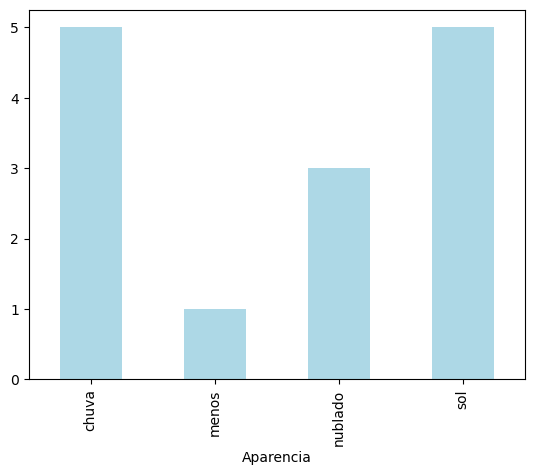

In [18]:
agrupado.plot.bar(color='lightblue')

In [19]:
#temperatura
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<Axes: xlabel='Temperatura'>

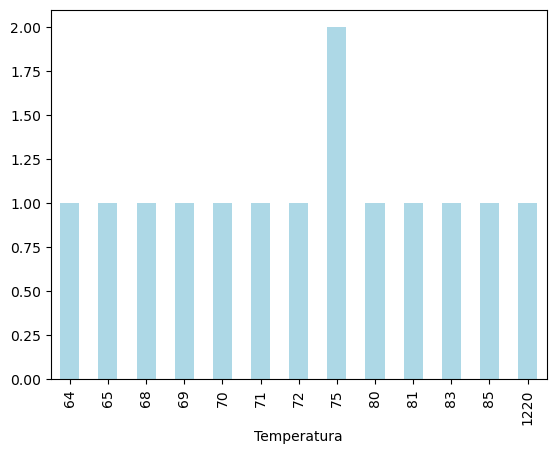

In [20]:
agrupado.plot.bar(color='lightblue')

In [21]:
#umidade
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

<Axes: xlabel='Umidade'>

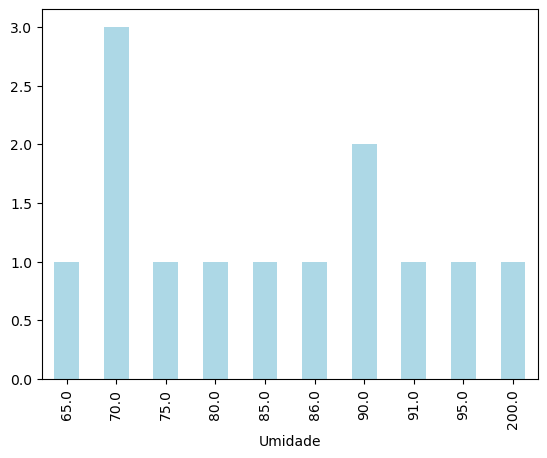

In [22]:
agrupado.plot.bar(color='lightblue')

In [25]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

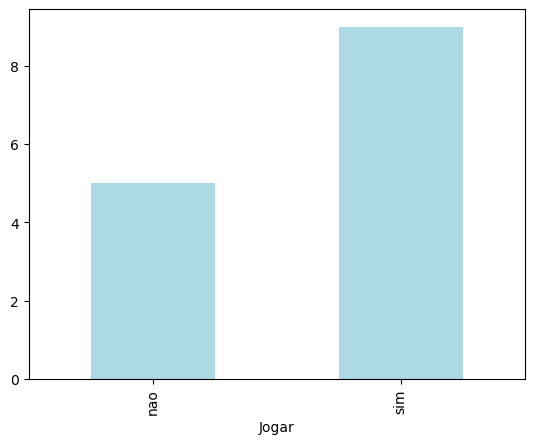

In [26]:
agrupado.plot.bar(color='lightblue')

In [27]:
#contando valores NAs
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [29]:
#remover NAs e substituir pela mediana
#umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [30]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [32]:
#substituir NAs por mediana
dataset['Umidade'].fillna(mediana, inplace=True)
#verificar se NA não existe mais
dataset['Umidade'].isnull().sum()

0

In [34]:
#remover NAs e substituir pela moda
#vento
dataset['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

In [35]:
#substituir NAs por moda
dataset['Vento'].fillna('Vento', inplace=True)
#verificar se NA não existe mais
dataset['Vento'].isnull().sum()

0

In [53]:
#corrigindo erro
#substituir 'vento' dos valores pela moda (falso)
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
Vento         1
dtype: int64

In [55]:
dataset.loc[dataset['Vento'].isin(['Vento']), 'Vento'] = "FALSO"
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [36]:
#verificar se todos os valores NAs sumiram
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [41]:
#remover 'menos' pela moda
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [56]:
dataset.loc[dataset['Aparencia'].isin(['menos']), 'Aparencia'] = "chuva"
agrupado = dataset.groupby(['Aparencia']).size()

In [57]:
#verificando o resultado
agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [45]:
#retirar valor inconsistente
#temperatura
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [46]:
#visualizar
dataset.loc[dataset['Temperatura'] > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [48]:
#substituir pela mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [49]:
#fazer a substituição
dataset.loc[dataset['Temperatura'] > 130, 'Temperatura'] = mediana
#verificar se existem dados inconsistentes
dataset.loc[dataset['Temperatura'] > 130]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [50]:
#retirar valor inconsistente
#umidade
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
85.5     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [58]:
#visualizar
dataset.loc[dataset['Umidade'] > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [59]:
#calcular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.25

In [60]:
#substituir pela mediana
dataset.loc[dataset['Umidade'] > 100, 'Umidade'] = mediana
#verificar se existem dados inconsistentes
dataset.loc[dataset['Umidade'] > 100]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [61]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
